Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import shutil
from sklearn.model_selection import train_test_split

In [2]:
# prompt: load data from gdrive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# prompt: import zip file from gdrive which contains images

!unzip -q "/content/drive/MyDrive/Colab Notebooks/CNN_assignment.zip" -d "/content/images" # Replace with the actual path to your zip file in Google Drive


In [4]:
data_dir_train = pathlib.Path("/content/images/images/Train")
data_dir_test = pathlib.Path('/content/images/images/Test')

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)


2239
118


In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
import tensorflow as tf

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=123
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=123
)

# Display class names
print(train_dataset.class_names)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [7]:
import matplotlib.pyplot as plt

# New Section

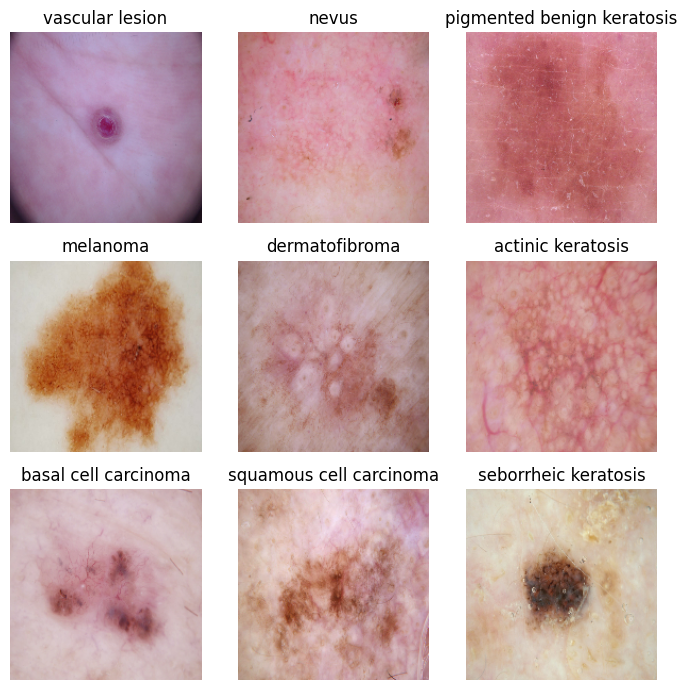

In [8]:
# Get class names
class_names = train_dataset.class_names
num_classes = len(class_names)

# Dictionary to store one image per class
images_per_class = {}

# Loop through dataset to collect one image per class
for images, labels in train_dataset:
    for img, label in zip(images, labels.numpy()):
        class_name = class_names[label]
        if class_name not in images_per_class:
            images_per_class[class_name] = img.numpy().astype("uint8")
        if len(images_per_class) == num_classes:
            break
    if len(images_per_class) == num_classes:
        break

# Plot images in a 3x3 grid (adjust if different number of classes)
plt.figure(figsize=(7, 7))
for i, (class_name, img) in enumerate(images_per_class.items()):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [9]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(180,180,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Adjust num_classes based on your dataset
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# normalize data
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_dataset = train_dataset.map(process)
val_dataset = val_dataset.map(process)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 257ms/step - accuracy: 0.2291 - loss: 2.9291 - val_accuracy: 0.3781 - val_loss: 1.7509
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 219ms/step - accuracy: 0.4270 - loss: 1.6665 - val_accuracy: 0.5168 - val_loss: 1.4823
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 195ms/step - accuracy: 0.5063 - loss: 1.4454 - val_accuracy: 0.5145 - val_loss: 1.4714
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 216ms/step - accuracy: 0.5200 - loss: 1.3990 - val_accuracy: 0.5324 - val_loss: 1.4552
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 216ms/step - accuracy: 0.5281 - loss: 1.3286 - val_accuracy: 0.5213 - val_loss: 1.4429
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 225ms/step - accuracy: 0.5604 - loss: 1.2384 - val_accuracy: 0.4519 - val_loss: 1.5494
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 198ms/step - accuracy: 0.5946 - loss: 1.1555 - val_accuracy: 0.5257 - val_loss: 1.5114
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 226ms/step - accuracy: 0.6245 - loss: 1.0354 - val_accu

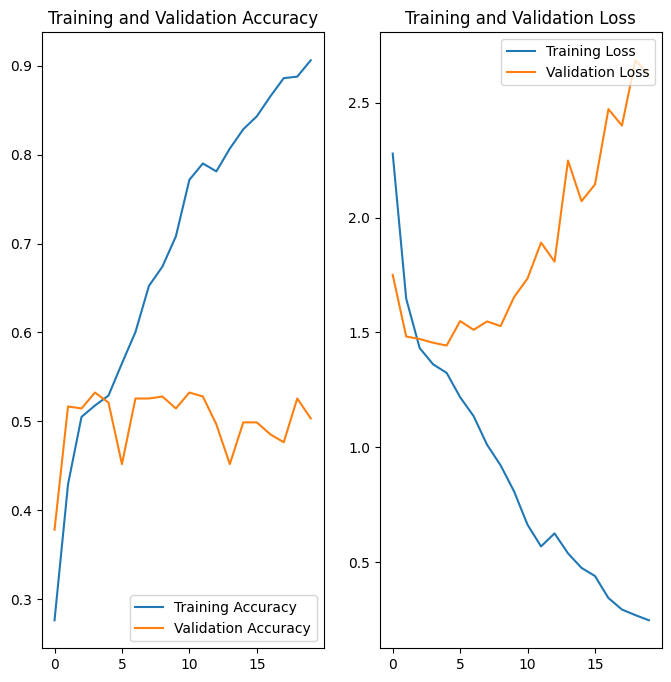

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

seems like the model is overfitting so adding dropout layer

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(180,180,3)),
    MaxPooling2D(2,2),
    Dropout(0.1),  # Dropout after max pooling

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.1),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.1),  # Dropout before the final layer

    Dense(num_classes, activation='softmax') # Adjust num_classes based on your dataset
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# normalize data
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_dataset = train_dataset.map(process)
val_dataset = val_dataset.map(process)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 203ms/step - accuracy: 0.1937 - loss: 2.0809 - val_accuracy: 0.2058 - val_loss: 2.0413
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 206ms/step - accuracy: 0.1921 - loss: 2.0187 - val_accuracy: 0.2058 - val_loss: 2.0263
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 220ms/step - accuracy: 0.1983 - loss: 2.0304 - val_accuracy: 0.2058 - val_loss: 2.0319
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 223ms/step - accuracy: 0.2113 - loss: 2.0053 - val_accuracy: 0.2058 - val_loss: 2.0271
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 222ms/step - accuracy: 0.1874 - loss: 1.9981 - val_accuracy: 0.2058 - val_loss: 2.0257
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 220ms/step - accuracy: 0.1993 - loss: 2.0039 - val_accuracy: 0.2058 - val_loss: 2.0264
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 222ms/step - accuracy: 0.1982 - loss: 2.0090 - val_accuracy: 0.2058 - val_loss: 2.0313
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 219ms/step - accuracy: 0.1989 - loss: 2.0150 - val_accu

In [16]:
# prompt: after adding dropout we see that accuracy takes a dip,
# lets find class imbalance for the images given in train dataset

import collections

# Count the images per class in the training dataset
class_counts = collections.Counter()
for images, labels in train_dataset:
    for label in labels.numpy():
        class_name = class_names[label]
        class_counts[class_name] += 1

# Print the class counts
for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Count: {count}")

# Calculate and print the class proportions
total_images = sum(class_counts.values())
for class_name, count in class_counts.items():
    proportion = count / total_images
    print(f"Class: {class_name}, Proportion: {proportion:.4f}")


Class: pigmented benign keratosis, Count: 370
Class: nevus, Count: 277
Class: melanoma, Count: 352
Class: dermatofibroma, Count: 77
Class: basal cell carcinoma, Count: 309
Class: squamous cell carcinoma, Count: 142
Class: vascular lesion, Count: 115
Class: seborrheic keratosis, Count: 58
Class: actinic keratosis, Count: 92
Class: pigmented benign keratosis, Proportion: 0.2065
Class: nevus, Proportion: 0.1546
Class: melanoma, Proportion: 0.1964
Class: dermatofibroma, Proportion: 0.0430
Class: basal cell carcinoma, Proportion: 0.1724
Class: squamous cell carcinoma, Proportion: 0.0792
Class: vascular lesion, Proportion: 0.0642
Class: seborrheic keratosis, Proportion: 0.0324
Class: actinic keratosis, Proportion: 0.0513


there seems to be class imbalance
pigmented benign keratosis has most number of samples

In [17]:
!pip install Augmentor

In [18]:
path_to_training_dataset="/content/images/images/Train/"
import Augmentor

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    # Define augmentation techniques
    p.flip_left_right(0.5)   # 50% chance of flipping image
    p.rotate(0.7, 10, 10)    # Rotate between -10 to +10 degrees
    p.zoom(0.5, 1.1, 1.5)    # Random zoom between 1.1x and 1.5x
    p.random_brightness(0.5, 0.7, 1.3)  # Adjust brightness
    p.sample(1000)

Initialised with 114 image(s) found.
Output directory set to /content/images/images/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F59F4282890>: 100%|██████████| 1000/1000 [00:33<00:00, 30.09 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/images/images/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F59F46E1910>: 100%|██████████| 1000/1000 [00:33<00:00, 30.28 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/images/images/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5A000E5090>: 100%|██████████| 1000/1000 [00:32<00:00, 30.43 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/images/images/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F59F4710610>: 100%|██████████| 1000/1000 [03:10<00:00,  5.26 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/images/images/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F59F47BDC10>: 100%|██████████| 1000/1000 [02:52<00:00,  5.79 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/images/images/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5A004BC090>: 100%|██████████| 1000/1000 [00:34<00:00, 29.16 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/images/images/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F5A7A6FA8D0>: 100%|██████████| 1000/1000 [01:24<00:00, 11.83 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/images/images/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F59F47E8AD0>: 100%|██████████| 1000/1000 [00:32<00:00, 30.61 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/images/images/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F59F47E53D0>: 100%|██████████| 1000/1000 [00:34<00:00, 29.15 Samples/s]


In [19]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=123
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=123
)

# Display class names
print(train_dataset.class_names)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.
Found 11239 files belonging to 9 classes.
Using 2247 files for validation.
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


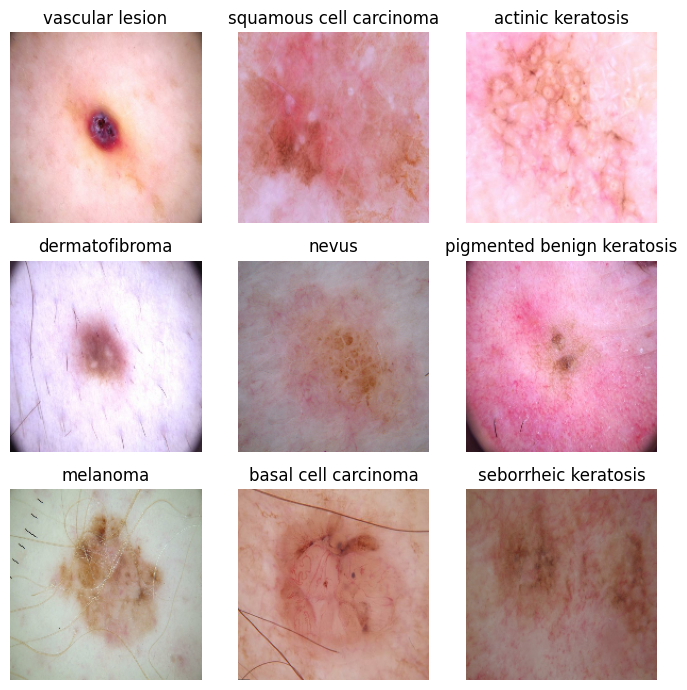

In [20]:
images_per_class = {}

# Loop through dataset to collect one image per class
for images, labels in train_dataset:
    for img, label in zip(images, labels.numpy()):
        class_name = class_names[label]
        if class_name not in images_per_class:
            images_per_class[class_name] = img.numpy().astype("uint8")
        if len(images_per_class) == num_classes:
            break
    if len(images_per_class) == num_classes:
        break

# Plot images in a 3x3 grid (adjust if different number of classes)
plt.figure(figsize=(7, 7))
for i, (class_name, img) in enumerate(images_per_class.items()):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(180,180,3)),
    MaxPooling2D(2,2),
    Dropout(0.1),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.1),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(num_classes, activation='softmax')  # Adjust num_classes based on your dataset
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# normalize data
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_dataset = train_dataset.map(process)
val_dataset = val_dataset.map(process)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50
)

Epoch 1/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 37s 117ms/step - accuracy: 0.1174 - loss: 2.1941 - val_accuracy: 0.1304 - val_loss: 2.1830
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 38s 118ms/step - accuracy: 0.1412 - loss: 2.1790 - val_accuracy: 0.1829 - val_loss: 2.1361
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 36s 130ms/step - accuracy: 0.1771 - loss: 2.1326 - val_accuracy: 0.2247 - val_loss: 2.0816
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 36s 127ms/step - accuracy: 0.2052 - loss: 2.0771 - val_accuracy: 0.2261 - val_loss: 2.0388
Epoch 5/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 37s 113ms/step - accuracy: 0.2233 - loss: 2.0307 - val_accuracy: 0.2572 - val_loss: 1.9761
Epoch 6/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 36s 129ms/step - accuracy: 0.2373 - loss: 1.9774 - val_accuracy: 0.2670 - val_loss: 1.9165
Epoch 7/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 41s 129ms/step - accuracy: 0.2523 - loss: 1.9074 - val_accuracy: 0.3008 - val_loss: 1.8522
Epoch 8/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 38s 117ms/step - accuracy: 0.2739 - loss: 1

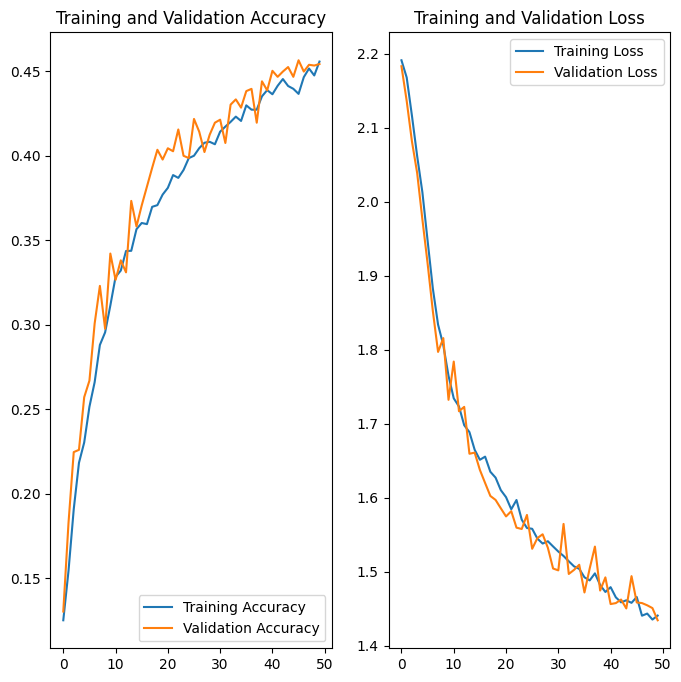

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()